# Intro to Pandas and Plotting

> Abstract: This is a short tutorial to motivate usage of Pandas and demonstrates some basic functionality for working with time series. Previous knowledge of [Numpy](https://docs.scipy.org/doc/numpy/user/quickstart.html) and [Matplotlib](https://matplotlib.org/tutorials/index.html) is assumed. See also: https://pandas.pydata.org/docs/getting_started/10min.html We show various plots, including basic time series statistics and error intervals.

In [1]:
%load_ext watermark
%watermark -i -v -p pandas,matplotlib

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

pandas    : 2.1.3
matplotlib: 3.8.2



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Organising data

Suppose we run an experiment with two variables, x and y. We could store these data as two numpy arrays assigned to variables `x` and `y`:

In [3]:
# Generate a sinusoidal signal with random noise
x = np.linspace(-2*np.pi, 2*np.pi, 744)
y = np.sin(x) + 0.5*np.random.rand(len(x))
print(x[:3], "...")
print(y[:3], "...")

[-6.28318531 -6.26627229 -6.24935928] ...
[0.42736955 0.06758237 0.2485598 ] ...


To manipulate our data (e.g plotting), we must pass both of these variables around

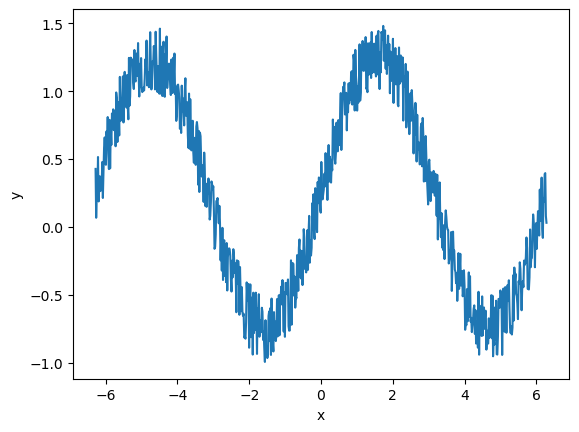

In [4]:
def plot_data_1(x, y):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    return fig, ax

plot_data_1(x,y);

This is manageable as there are only two variables, but if we were to add more variables to our collection (e.g. other concurrent measurements), or if we wanted to store extra information about each variable, this would rapidly become annoying to handle.

To organise the variables better, we could assign them to a dictionary, `d`. Now we only have to pass one object to our plotting function. We also use the key names in the dictionary to describe our data (in this case, just x and y).

In [5]:
d = {"x": x, "y": y}
print("x:", d["x"][:3], "...")
print("y:", d["y"][:3], "...")

x: [-6.28318531 -6.26627229 -6.24935928] ...
y: [0.42736955 0.06758237 0.2485598 ] ...


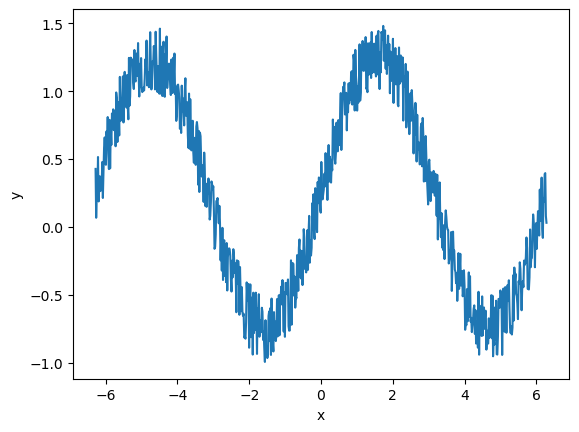

In [6]:
def plot_data_2(d, xvar="x", yvar="y"):
    fig, ax = plt.subplots()
    ax.plot(d[xvar], d[yvar])
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)
    return fig, ax

plot_data_2(d);

We could go on like this, adding new measurements to this dictionary, and defining different datasets (including their various measurements) as different dictionaries. But there is a better way.

## Working with dataframes

The `pandas.DataFrame` organises tabular data and provides convenient tools for computation and visualisation. Dataframes act much like a spreadsheet (or a SQL database) and are inspired partly by the R programming language. They consist of *columns* (here, we named them `x` and `y`), and *rows*. Each column should contain the same number of elements, and each row refers to some related measurements. Dataframes also have an `index` which identifies the rows - in our case they have just been labelled as integers that match the indexes in the original input arrays.

Pandas comes with [many I/O tools](https://pandas.pydata.org/docs/reference/io.html) to load dataframes. We can also create one from a dictionary:

In [7]:
df = pd.DataFrame.from_dict(d)
df

,x,y
0,-6.283185,0.427370
1,-6.266272,0.067582
2,-6.249359,0.248560
3,-6.232446,0.266928
4,-6.215533,0.515049
...,...,...
739,6.215533,0.188268
740,6.232446,0.389450
741,6.249359,0.396558
742,6.266272,0.080943


There is an underlying Numpy array that can be accessed through the `.values` property:

In [8]:
df.values[:5, :]

array([[-6.28318531,  0.42736955],
       [-6.26627229,  0.06758237],
       [-6.24935928,  0.2485598 ],
       [-6.23244626,  0.26692824],
       [-6.21553324,  0.51504885]])

We can still extract the separate arrays (x and y) similar to interacting with a dictionary:

In [9]:
type(df["x"].values)

numpy.ndarray

We can append new data to the dataframe just like appending a variable to a dictionary. The new data should be the same length as the dataframe, but if a constant is supplied then that is used for every row:

In [10]:
df["y_error"] = 0.3

Some of the real advantages of using Pandas come when we employ a more useful index. If our measurements are taken at different times, we can set the index as a time-aware object. This uses the [Pandas DatetimeIndex](https://pandas.pydata.org/docs/reference/indexing.html#datetimeindex) which is related to the [datetime standard library](https://docs.python.org/3/library/datetime.html)

In [11]:
# Generate some sample times at hourly intervals over a month
df["time"] = pd.date_range("2020-01-01", "2020-02-01", periods=745, inclusive="left")
df = df.set_index("time")
df

,x,y,y_error
time,,,
2020-01-01 00:00:00,-6.283185,0.427370,0.3
2020-01-01 01:00:00,-6.266272,0.067582,0.3
2020-01-01 02:00:00,-6.249359,0.248560,0.3
2020-01-01 03:00:00,-6.232446,0.266928,0.3
2020-01-01 04:00:00,-6.215533,0.515049,0.3
...,...,...,...
2020-01-31 19:00:00,6.215533,0.188268,0.3
2020-01-31 20:00:00,6.232446,0.389450,0.3
2020-01-31 21:00:00,6.249359,0.396558,0.3


In [12]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

It is reasonable to use dataframes to contain your data, use it for easily reading and writing to files, and to apply Numpy-based transformations and other computation, together with plotting routines using Matplotlib. However there are also [many ways to use Pandas for manipulating data](https://pandas.pydata.org/docs/user_guide/cookbook.html) which are not covered here.

Below we show a few basic ways to plot time series.

## Plotting with dataframes

We can use the `.plot()` method to access the Pandas plotting API which itself creates Matplotlib objects. This mechanism is rather complex but enables [many convenient shortcuts](https://pandas.pydata.org/docs/reference/frame.html#plotting) to creating complex figures.

<Axes: xlabel='time'>

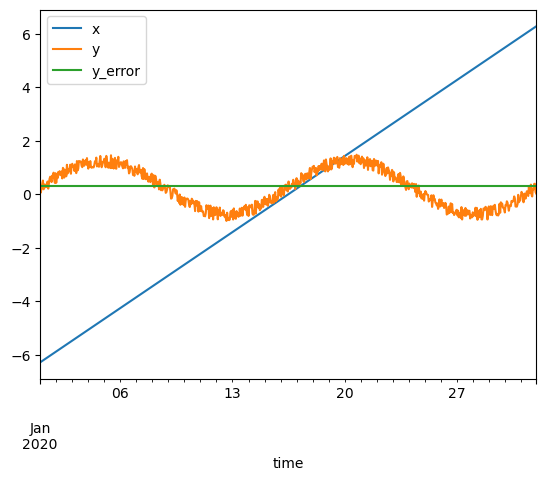

In [13]:
df.plot()

It takes some time to get familiar with this API but after that it becomes very useful for rapid feedback and iteration while playing with data, particularly in combination with Jupyter notebooks.

<Axes: xlabel='time'>

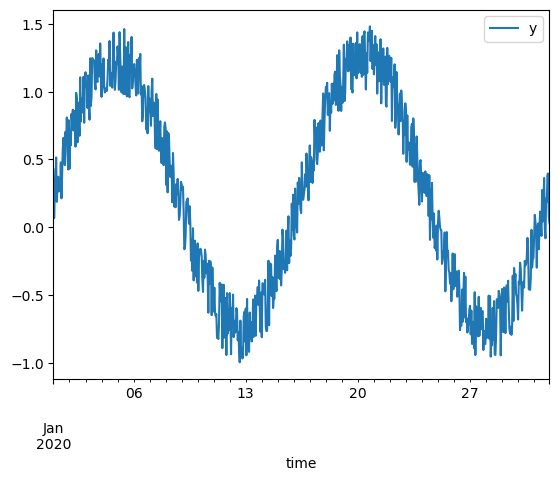

In [14]:
df.plot(y="y")

Let's try some things to better visualise this time series.

We can use the [resampling system](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-resampling) to change the data from hourly samples to daily samples based on the mean of the measurements taken each day. We can directly feed the derived dataframe into a plotting command.

In [15]:
df.resample("1d")

<Axes: xlabel='time'>

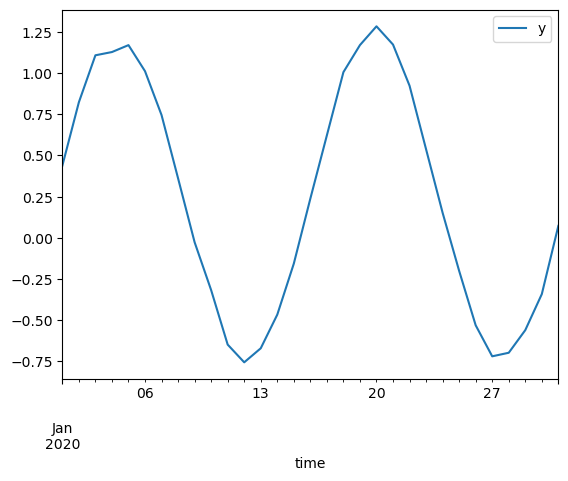

In [16]:
df.resample("1d").mean().plot(y="y")

A related method is [rolling calculations](https://pandas.pydata.org/docs/user_guide/computation.html#stats-moments-ts-versus-resampling):

<Axes: xlabel='time'>

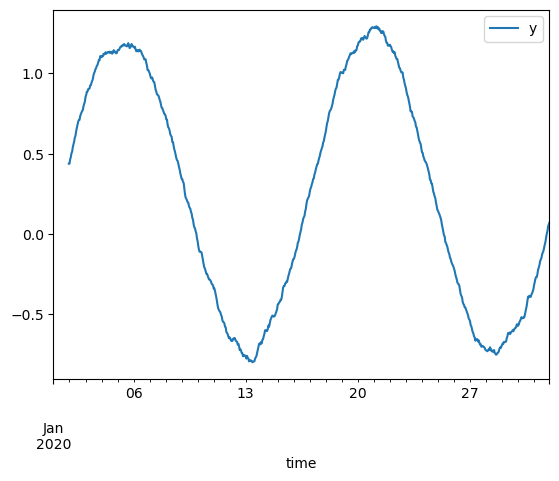

In [17]:
df.rolling(24).mean().plot(y="y")

For more, see e.g. https://ourcodingclub.github.io/2019/01/07/pandas-time-series.html

Rather than just creating the plot straight away as above, we can instead [instantiate a Matplotlib axes](https://matplotlib.org/tutorials/introductory/usage.html#coding-styles), and then direct Pandas to plot onto it. This enables some more flexible configuration, like plotting aspects from two dataframes onto one axes:

<Axes: xlabel='time'>

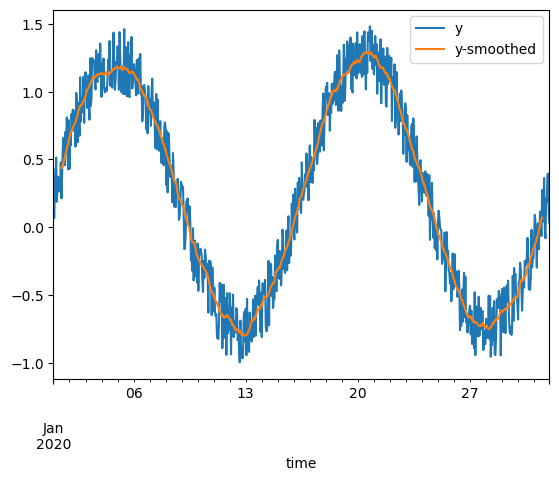

In [18]:
fig, ax = plt.subplots()
df.plot(y="y", ax=ax)
df.rolling(24, center=True).mean().plot(y="y", ax=ax, label="y-smoothed")

As an example of the more configurable plotting options through `.plot()`, let's show the error bars on measurements. To make them visible, we first subselect down to only every 24th measurement [using .iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html).

<Axes: xlabel='x', ylabel='y'>

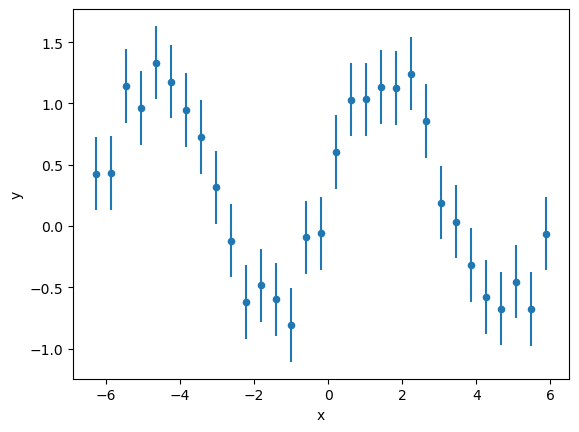

In [19]:
df.iloc[::24].plot(x="x", y="y", kind="scatter", yerr="y_error")

Beware! If we had resampled the dataframe like in the previous steps, the resampling logic would also have applied to the `y_error` column. You would instead need to supply the correct error propagation mechanism yourself.

Note that we had to resort to plotting against the "x" data instead of the index (time) because of a limitation in what the "scatter" option can do. Plotting against the index is not supported - this could be worked around by creating an extra column to use: `df["time"] = df.index`. Another option is to create the plot ourselves [using the Matplotlib API](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.errorbar.html):

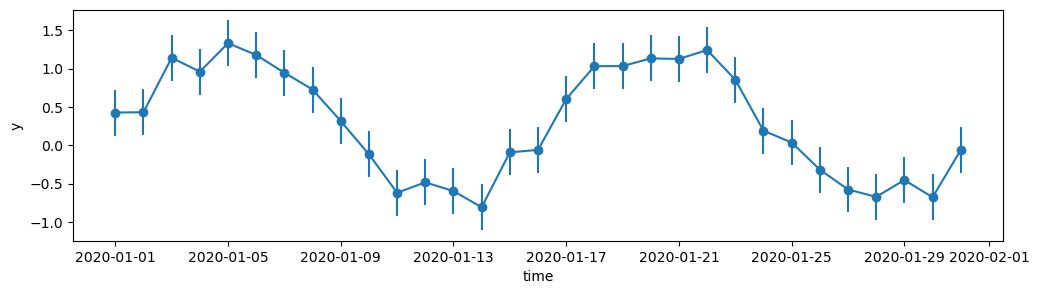

In [20]:
_df = df.iloc[::24]
fig, ax = plt.subplots(figsize=(12, 3))
ax.errorbar(_df.index, _df["y"], yerr=_df["y_error"], marker="o")
ax.set_ylabel("y")
ax.set_xlabel("time");

Above, we subsampled the data in order to create a clear visualisation with vertical error bars. To show the error intervals on the original data it is better to shade the area with [fill_between](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.fill_between.html):

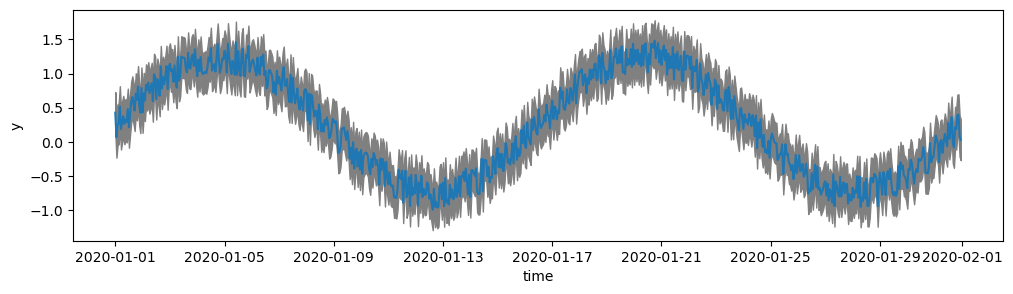

In [21]:
fig, ax = plt.subplots(figsize=(12, 3))
x = df.index
y = df["y"]
y1 = y - df["y_error"]
y2 = y + df["y_error"]
ax.plot(x, y)
ax.fill_between(x, y1, y2, color="grey")
ax.set_ylabel("y")
ax.set_xlabel("time");

Rather than using the provided error values, we might choose to plot the spread in the data itself. In the example below we create a new `df_daily` dataframe that contains the daily means and standard deviations of measurements. We use these to plot the mean and spread in the measurements.

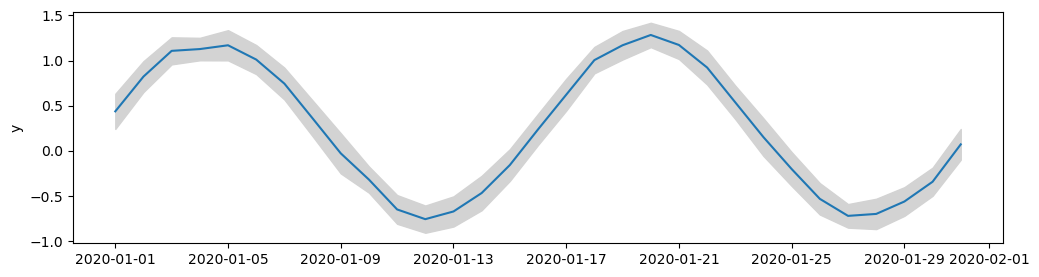

In [22]:
def plot_daily_means(df, ax):
    df_daily = (
        df.resample("1d").mean()
        .drop(columns=["x", "y_error"])
        .rename(columns={"y": "y_mean"}))
    df_daily["y_std"] = df["y"].resample("1d").std()

    ax.plot(df_daily.index, df_daily["y_mean"])
    ax.fill_between(
        df_daily.index,
        df_daily["y_mean"] - df_daily["y_std"],
        df_daily["y_mean"] + df_daily["y_std"],
        color="lightgrey")
    ax.set_ylabel("y");

fig, ax = plt.subplots(figsize=(12, 3))
plot_daily_means(df, ax)

When we create a figure like this, it is useful to define the plotting routine as a function that applies to a [Matplotlib Axes object](https://matplotlib.org/tutorials/introductory/usage.html#axes). This way we can control the figure setup (geometry, other plots etc.) separately from the detailed plotting commands. The figure can be manipulated more cleanly in this way. Other subplots can be easily combined into one figure, or other configurations applied: for example, we might later add on grid lines without modifying the original plotting code:

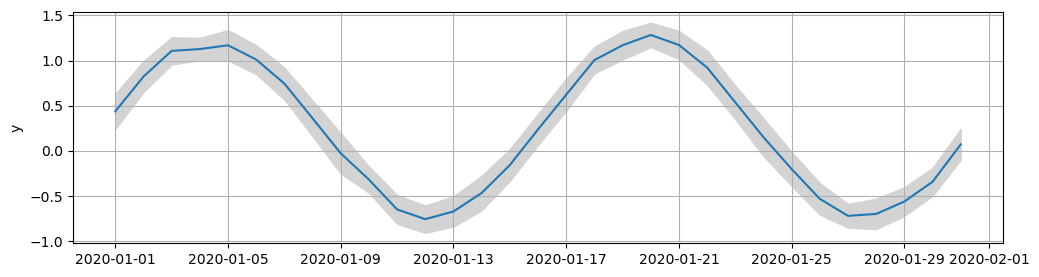

In [23]:
ax.grid(True)
fig

## Customising figures

We can continue modifying the figure above since we still have access to the `fig` and `ax` objects which contain the figure. Roughly speaking, the `fig` object (figure) can be considered as the page on which we are drawing, and the `ax` object (axes) refers to the particular subplot (though in this case, there is only one plot).

Let's update the display of the plot and redraw it:
- We can get matplotlib to directly render $\LaTeX$ elements for us by using the `$...$` pattern
- `set_xlabel`, `set_ylabel`, `set_title` let us update the labels in place
- `set_ylim` controls the lower and upper limits on the y axis

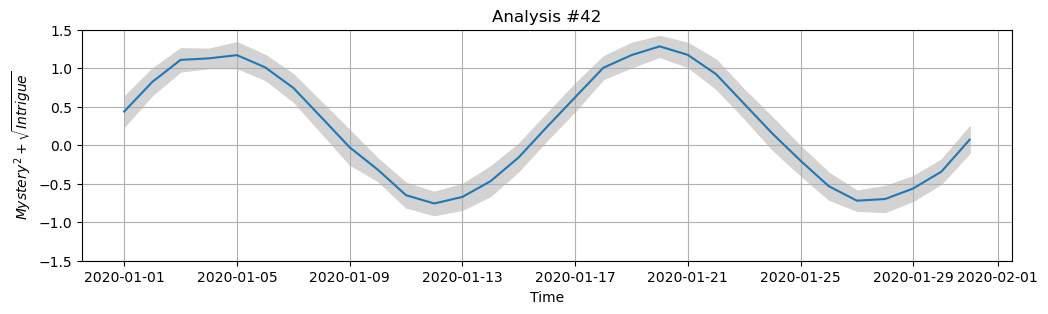

In [24]:
ax.set_xlabel("Time")
ax.set_ylabel("$Mystery^2 + \sqrt{Intrigue}$")
ax.set_title("Analysis #42")
ax.set_ylim((-1.5, 1.5))
fig

## To xarray

There are some limitations with `pandas.DataFrame` that make it not so suitable for the physical sciences. [**Xarray**](http://xarray.pydata.org/en/stable/why-xarray.html) fills some of these gaps and is mostly compatible with Pandas, providing a similar API. To learn more, please refer to [a full tutorial](https://xarray-contrib.github.io/xarray-tutorial/). Below is a little motivation as to why you might want to invest the time.

We can transform a `pandas.DataFrame` into a `xarray.Dataset` with `.to_xarray()`:

In [25]:
ds = df.to_xarray()
ds

<xarray.Dataset>
Dimensions:  (time: 744)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
Data variables:
    x        (time) float64 -6.283 -6.266 -6.249 -6.232 ... 6.249 6.266 6.283
    y        (time) float64 0.4274 0.06758 0.2486 ... 0.3966 0.08094 0.03065
    y_error  (time) float64 0.3 0.3 0.3 0.3 0.3 0.3 ... 0.3 0.3 0.3 0.3 0.3 0.3

Similar quick plotting can be peformed, but the mechanism is different due to the greater complexity of the data structure.

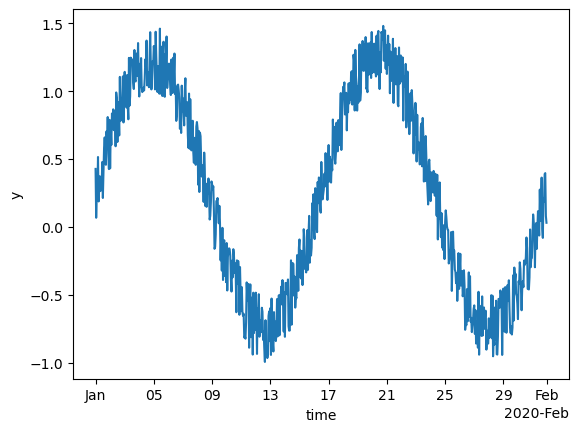

In [26]:
ds["y"].plot.line()

The primary advantage of xarray is that it extends Pandas-like functionality to n-dimensional data. In Pandas, each column is limited to contain a 1-dimensional array (though this can be worked around by using a MultiIndex). In xarray, each "data variable" (itself an `xarray.DataArray`) can hold an n-dimensional array, with each dimension carrying a dimension name. To provide label-based access, dimensions can have associated coordinates. In our example, the data variables (`x`, `y`, `y_error`) have the `time` dimension which has datetime-based coordinates.

We might add more complex data, `v`, which has a spatial component as well. We need to provide dimension names in order to do this (see also: [xarray.Dataset.assign](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.assign.html))

In [27]:
v = np.random.rand(len(ds["time"]), 3)
ds["v"] = (("time", "space"), v)
ds

<xarray.Dataset>
Dimensions:  (time: 744, space: 3)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
Dimensions without coordinates: space
Data variables:
    x        (time) float64 -6.283 -6.266 -6.249 -6.232 ... 6.249 6.266 6.283
    y        (time) float64 0.4274 0.06758 0.2486 ... 0.3966 0.08094 0.03065
    y_error  (time) float64 0.3 0.3 0.3 0.3 0.3 0.3 ... 0.3 0.3 0.3 0.3 0.3 0.3
    v        (time, space) float64 0.4793 0.7885 0.425 ... 0.4429 0.4777 0.451

Another advantage of xarray is support for metadata. For example, we can add units and a description by changing the `.attrs` (attributes) property of the `DataArray`:

In [28]:
ds["v"].attrs = {"units": "m/s", "description": "A velocity vector"}

Plotting commands can automatically handle the multi-dimensional aspect, as well as adding the provided units to the axis labels.

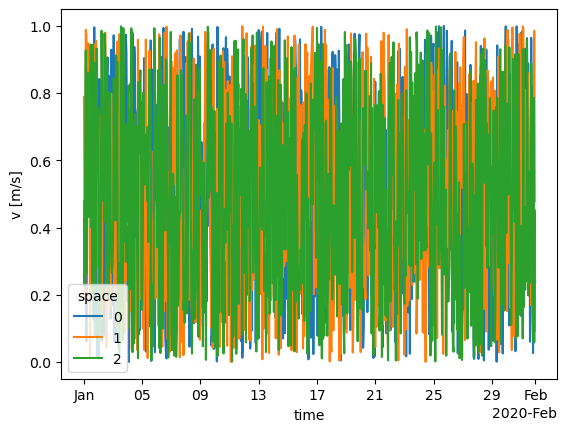

In [29]:
ds["v"].plot.line(x="time");

To-do: tutorial on indexing and other aspects - see http://xarray.pydata.org/en/stable/indexing.html